
# Session 2 Exercise: Data Analysis and Visualization with NumPy, pandas, and Matplotlib

In this exercise, you will clean and analyze a dataset using NumPy, pandas, and matplotlib. This will allow you to:
- Perform some data cleaning on the dataset.
- Perform numerical operations with NumPy.
- Load, explore, and filter data using pandas.
- Visualize data trends with matplotlib.

The dataset provided is `city_temperature_with_nan.csv` (https://drive.google.com/file/d/1YFTana8aJU4vSnVDuQGkQjJ8el-g64qL/view?usp=drive_link) with the following columns:
- **City**: Name of the city.
- **Date**: Date of the recorded temperature (YYYY-MM-DD).
- **Temperature**: Recorded temperature in degrees Celsius (some missing values).
- **Rainfall (mm)**: Recorded rainfall in millimeters (some missing values).
- **Time Zone**: Time zone city is located.

### Submission Instructions:
1. Rename your notebook in the following format: lastname_firstname.ipynb
2. Download your notebook from the dashboard to your local computer.
3. Email your notebook to egarza@tacc.utexas.edu, use subject line: ACSC Session 2 Deliverable

### Deadline to Submit
- Submit by 5:00p CT, 4:00p MT, 3:00p PT, 2:00p AKT, 12:00p HT Monday, July 14, 2025


## Pre Setup: importing necessary libraries

In [7]:

# import any libraries that you will require to clean and analyze the dataset
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


import seaborn as sns









## Part 0: Data Cleaning with pandas

Before starting the analysis, we need to ensure our data is clean and free of inconsistencies. This is an essential step in data analysis to handle missing values and make sure our data is in a suitable format for analysis.

### Task:
1. Identify missing values in the dataset.
2. Why do you think those values are missing? Write your hypothesis as a comment in the code.
3. Apply the following methods to handle missing values:
   - Method 1: Fill missing values in `Temperature` with a specific value (e.g., mean or median of the column) for each city.
   - Method 2: Replace missing values in `Rain` with zero.
4. Check for and remove any duplicate rows.

Let's start by identifying missing values in the `Temperature` and `Rainfall (mm)` columns.


In [8]:

# Load the dataset with NaN valuesz

df = pd.read_csv('StressLevelDataset.csv')
df.head()



,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [10]:

# Step 3: Inspect the structure and basic statistics of the dataset
df.info()
df.describe()
df.isnull().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

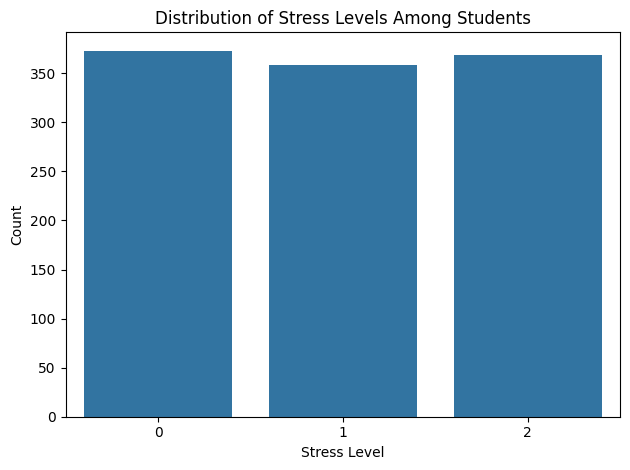

In [11]:
# Step 4: Visualize the distribution of the target variable 'stress_level'
sns.countplot(x='stress_level', data=df)
plt.title('Distribution of Stress Levels Among Students')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [12]:

# Step 5: Compute correlations with 'stress_level' and show top 10
correlations = df.corr()['stress_level'].sort_values(ascending=False)
print(correlations.head(10))



stress_level                  1.000000
bullying                      0.751162
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
peer_pressure                 0.690684
noise_level                   0.663371
mental_health_history         0.648644
Name: stress_level, dtype: float64


/tmp/ipykernel_729045/3826994901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.head(10).values, y=correlations.head(10).index, palette='coolwarm')


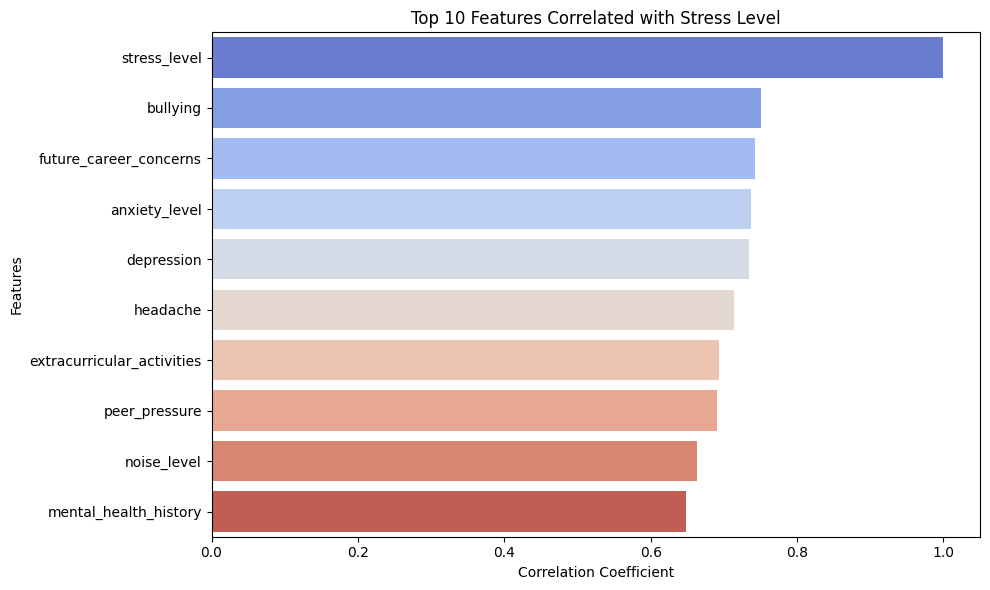

In [13]:

# Step 6: Visualize top 10 features most correlated with 'stress_level' using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.head(10).values, y=correlations.head(10).index, palette='coolwarm')
plt.title('Top 10 Features Correlated with Stress Level')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()





In [14]:
# Step 7: Prepare a DataFrame for bubble chart visualization
if 'stress_level' in correlations.index:
    top_corr = correlations.drop('stress_level').head(10)
else:
    top_corr = correlations.head(10)

bubble_data = pd.DataFrame({
    'Feature': top_corr.index,
    'Correlation': top_corr.values,
    'Size': abs(top_corr.values) * 1500  # Adjust marker size for bubble chart
})
bubble_data


,Feature,Correlation,Size
0,bullying,0.751162,1126.743377
1,future_career_concerns,0.742619,1113.927907
2,anxiety_level,0.736795,1105.193134
3,depression,0.734379,1101.567861
4,headache,0.713484,1070.226060
5,extracurricular_activities,0.692977,1039.465299
6,peer_pressure,0.690684,1036.025936
7,noise_level,0.663371,995.056981
8,mental_health_history,0.648644,972.965994
9,study_load,0.634156,951.233250


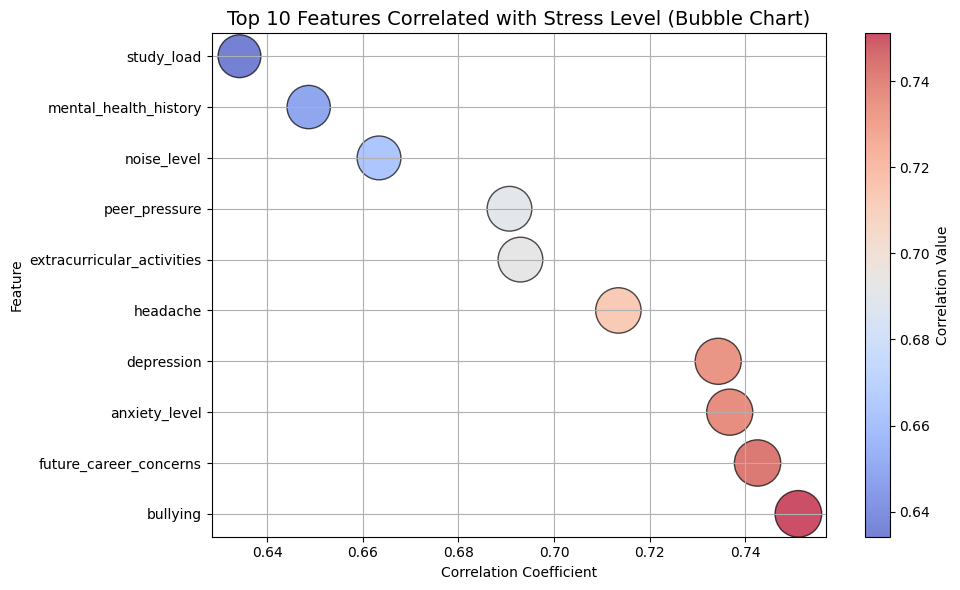

In [15]:
# Step 8: Create a bubble chart for the top correlated features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=bubble_data['Correlation'],
    y=bubble_data['Feature'],
    s=bubble_data['Size'],
    c=bubble_data['Correlation'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='black'
)
plt.title('Top 10 Features Correlated with Stress Level (Bubble Chart)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.colorbar(scatter, label='Correlation Value')
plt.grid(True)
plt.tight_layout()
plt.show()



## Part 1: Numerical Analysis with NumPy

First, we'll use NumPy to perform basic operations on the Temperature data.

### Task:
- Extract the Temperature column as a NumPy array.
- Calculate the mean, minimum, maximum, and standard deviation of the temperatures.


In [16]:

# Step 9: Check total and percent of missing values per column
total_missing = df.isnull().sum()
percent_missing = (total_missing / len(df)) * 100

missing_data = pd.DataFrame({
    'Total Missing': total_missing,
    'Percent Missing': percent_missing
}).sort_values(by='Percent Missing', ascending=False)

missing_data



,Total Missing,Percent Missing
anxiety_level,0,0.0
basic_needs,0,0.0
bullying,0,0.0
extracurricular_activities,0,0.0
peer_pressure,0,0.0
social_support,0,0.0
future_career_concerns,0,0.0
teacher_student_relationship,0,0.0
study_load,0,0.0
academic_performance,0,0.0


In [17]:
# Step 10: Fill missing values

# For numeric columns, fill with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns (if any), fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Confirm all missing values are handled
df.isnull().sum()




anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [18]:
# Step 11: Define features (X) and target (y)
X = df.drop('stress_level', axis=1)  # Features
y = df['stress_level']               # Target

# Check shapes
X.shape, y.shape




((1100, 20), (1100,))


## Part 2: Data Analysis with pandas

In this section, we'll load and explore the dataset using pandas.

### Task:
- Display basic information and statistics on the dataset.
- Calculate the mean temperature and total rainfall for each city.


In [19]:
# Step 12: Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((880, 20), (220, 20), (880,), (220,))

In [20]:

# Step 13: Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)





LogisticRegression(max_iter=1000)

In [21]:

# Step 14: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8863636363636364

Confusion Matrix:
 [[66  6  4]
 [ 6 65  2]
 [ 4  3 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       0.88      0.89      0.88        73
           2       0.91      0.90      0.91        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [27]:

# print out your output




                 Temperature  Rainfall (mm)
City                                       
Albuquerque         4.905379     149.787003
Anchorage          -3.611413     321.859076
Austin             16.679711     184.557174
Chicago            12.563535     199.409929
Dallas             12.680326     308.829294
Denver              2.880807     125.448265
El Paso             7.719403     157.268066
Fort Lauderdale     6.188207     330.456094
Honolulu           24.082116     110.499812
Houston            13.065068     263.688112
Jacksonville        4.795311     301.555928
Las Vegas          16.364614     238.940916
Los Angeles        12.985810     319.738133
New York            8.495912     284.571269
Philadelphia        4.957293     273.990360
Phoenix             9.590779     189.224190
San Antonio        11.072945     364.994236
San Diego          13.415304     149.241248
San Francisco      17.604752     219.236626



## Part 3: Filtering and Subsetting Data

We will now filter the data to focus on specific records.

### Task:
- Filter records where temperature is above 25°C.
- Subset data to only include records from a specific city (e.g., "New York").


In [29]:

# Filter records where temperature is above 25°C




,City,Date,Temperature,Rainfall (mm),Time Zone
46,Austin,1/7/23,28.752960,32.349323,Central Time
49,Austin,1/10/23,27.126797,2.641847,Central Time
184,Honolulu,1/5/23,26.709495,13.386549,Hawaii-Aleutian Time
187,Honolulu,1/8/23,26.642079,22.257701,Hawaii-Aleutian Time
189,Honolulu,1/10/23,28.832127,0.000000,Hawaii-Aleutian Time


In [30]:

# Filter records for a specific city (e.g., New York)




,City,Date,Temperature,Rainfall (mm),Time Zone
0,New York,1/1/23,9.196294,33.345299,Eastern Time
1,New York,1/2/23,3.180465,56.888672,Eastern Time
2,New York,1/3/23,14.764003,0.000000,Eastern Time
3,New York,1/4/23,11.644596,0.000000,Eastern Time
4,New York,1/5/23,8.495912,40.433451,Eastern Time



## Part 4: Data Visualization with Matplotlib

Visualize the data using matplotlib to identify trends and comparisons.

### Task:
- Plot the temperature trend over time for a specific city (e.g., "New York").
- Create a bar chart comparing total rainfall across different cities.


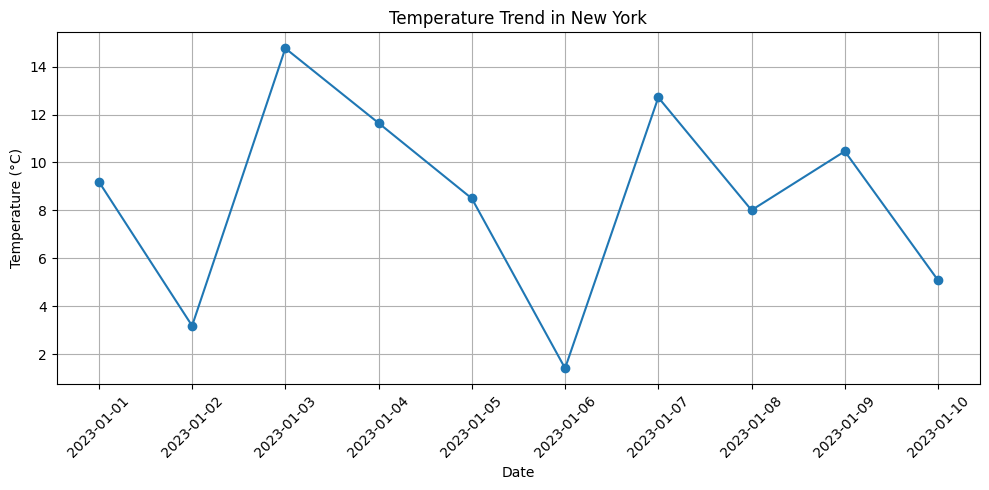

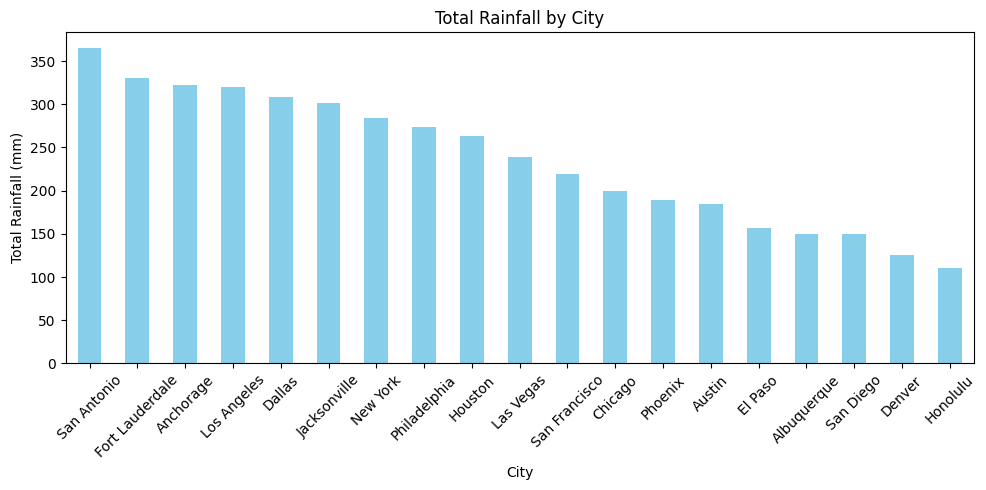

In [32]:

# import necessary libraries
import matplotlib.pyplot as plt

# Line plot for temperature trend over time (e.g., for New York)



# Bar chart for total rainfall by city


# Bar chart for total rainfall by city





## Summary

In this exercise, you demonstrated how to:
- Perform data cleaning with pandas.
- Conduct numerical analysis with NumPy.
- Explore and filter data with pandas.
- Visualize data trends and comparisons with matplotlib.

Complete each section and ensure the results are well-documented.

### Submission Instructions:
1. Rename your notebook in the following format: lastname_firstname.ipynb
2. Download your notebook from the dashboard to your local computer.
3. Email your notebook to egarza@tacc.utexas.edu, use subject line: ACSC Session 2 Deliverable

### Deadline to Submit
- Submit by 5:00p CT, 4:00p MT, 3:00p PT, 2:00p AKT, 12:00p HT Monday, July 14, 2025
